In [1]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("car_data_2.csv",sep=',', encoding='latin-1')


In [3]:
df=data[data['Is_sold_every_year']=="YES"]
#df=df[df['yearmodel']==2018]
df_clustering=(df.pivot(index='Myyntivuosi', columns='Specific_type_of_car', values='Med price' ))

In [5]:
#df_clustering[df_clustering.columns[0]]

Myyntivuosi
2018    3400
2019    3200
2020    2980
2021    2490
2022    2380
2023    1980
Name: 2003_Audi_A3_Viistoperä_Etuveto_Bensiini_1,6_Manuaali, dtype: int64

In [6]:
kol=list(range(2018,2024))

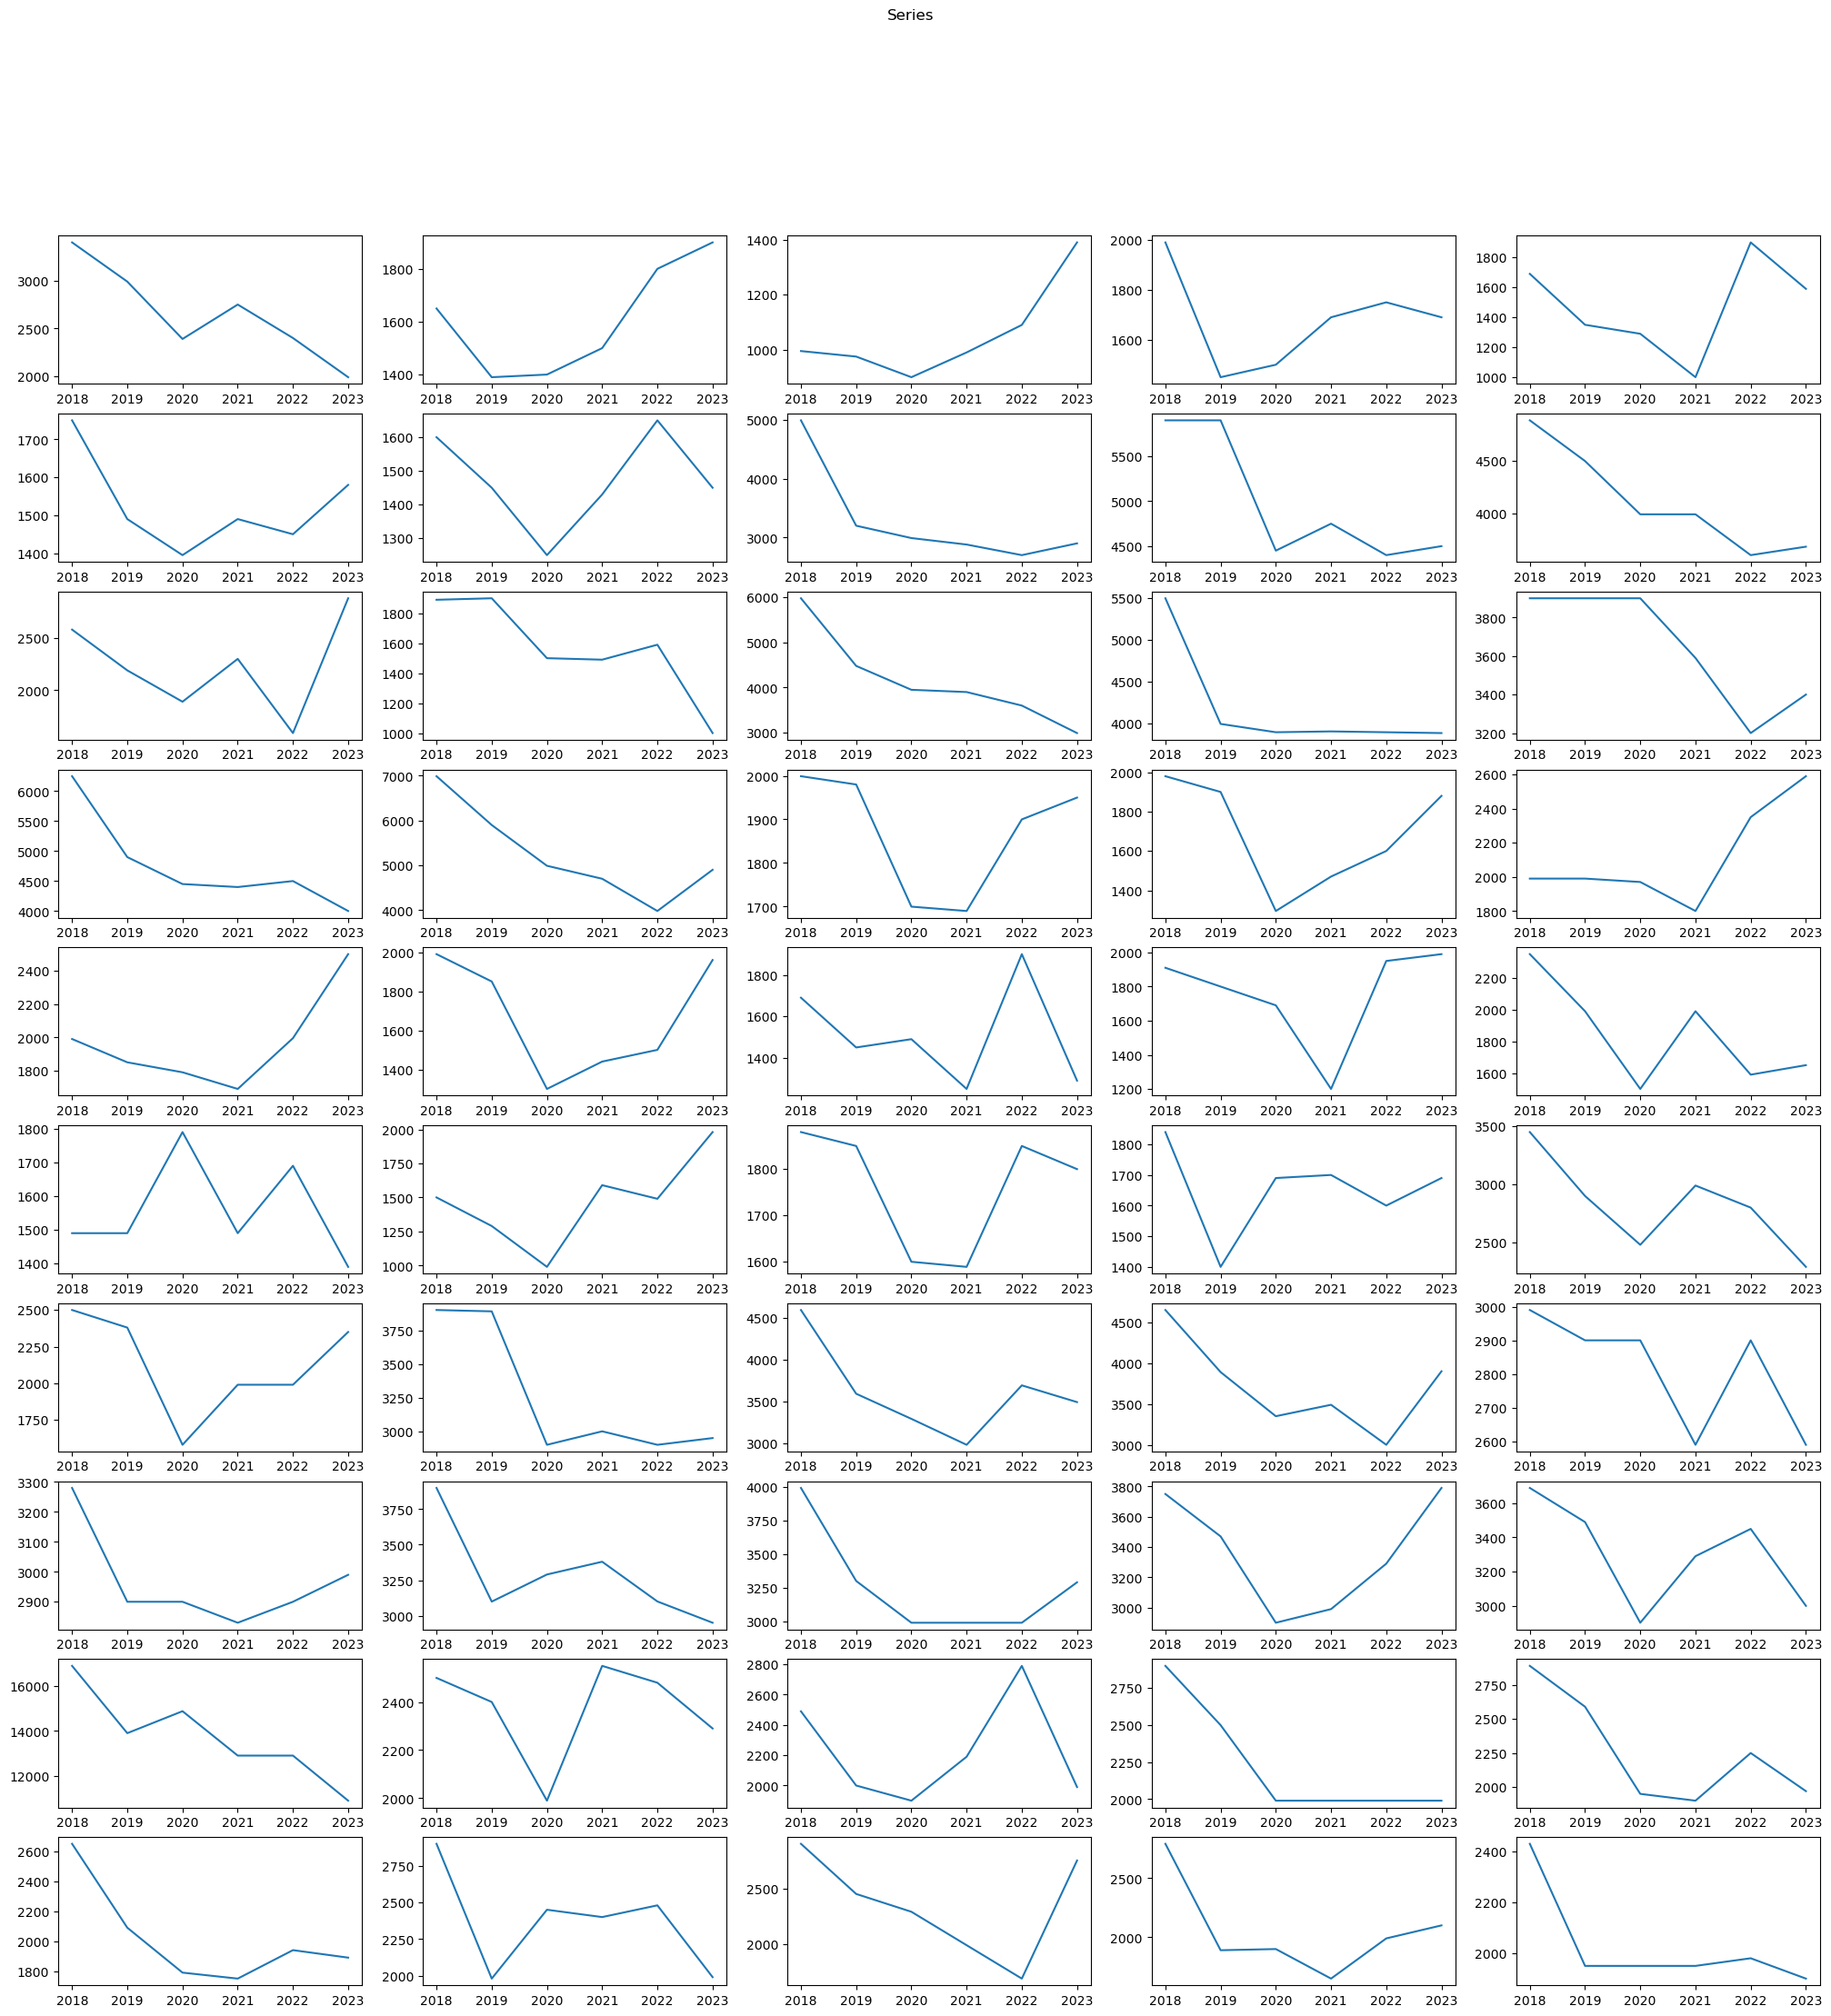

In [7]:
a=10
b=5
fig, axs = plt.subplots(a,b,figsize=(25,25))
fig.suptitle('Series')

for i in range(a):
        for j in range(b):
            #if i*4+j+1>229: # pass the others that we can't fill
                #continue
            axs[i, j].plot(df_clustering[df_clustering.columns[i*b+j+1]])

plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

for i in range(len(df_clustering.columns)):
    aa=df_clustering.iloc[:,i].values 
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    df_clustering.iloc[:,i] = scaler.fit_transform(aa.reshape(-1,1)) 


In [1]:
#df_clustering

In [10]:
arr = df_clustering.to_numpy()


In [11]:
arr=arr.transpose()

In [12]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(df_clustering.columns))))

In [15]:
som_x=som_y=5
som = MiniSom(som_x,som_y,6, sigma=0.3, learning_rate = 0.1)


In [16]:

som.random_weights_init(arr)
som.train(arr, 50000)

In [17]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

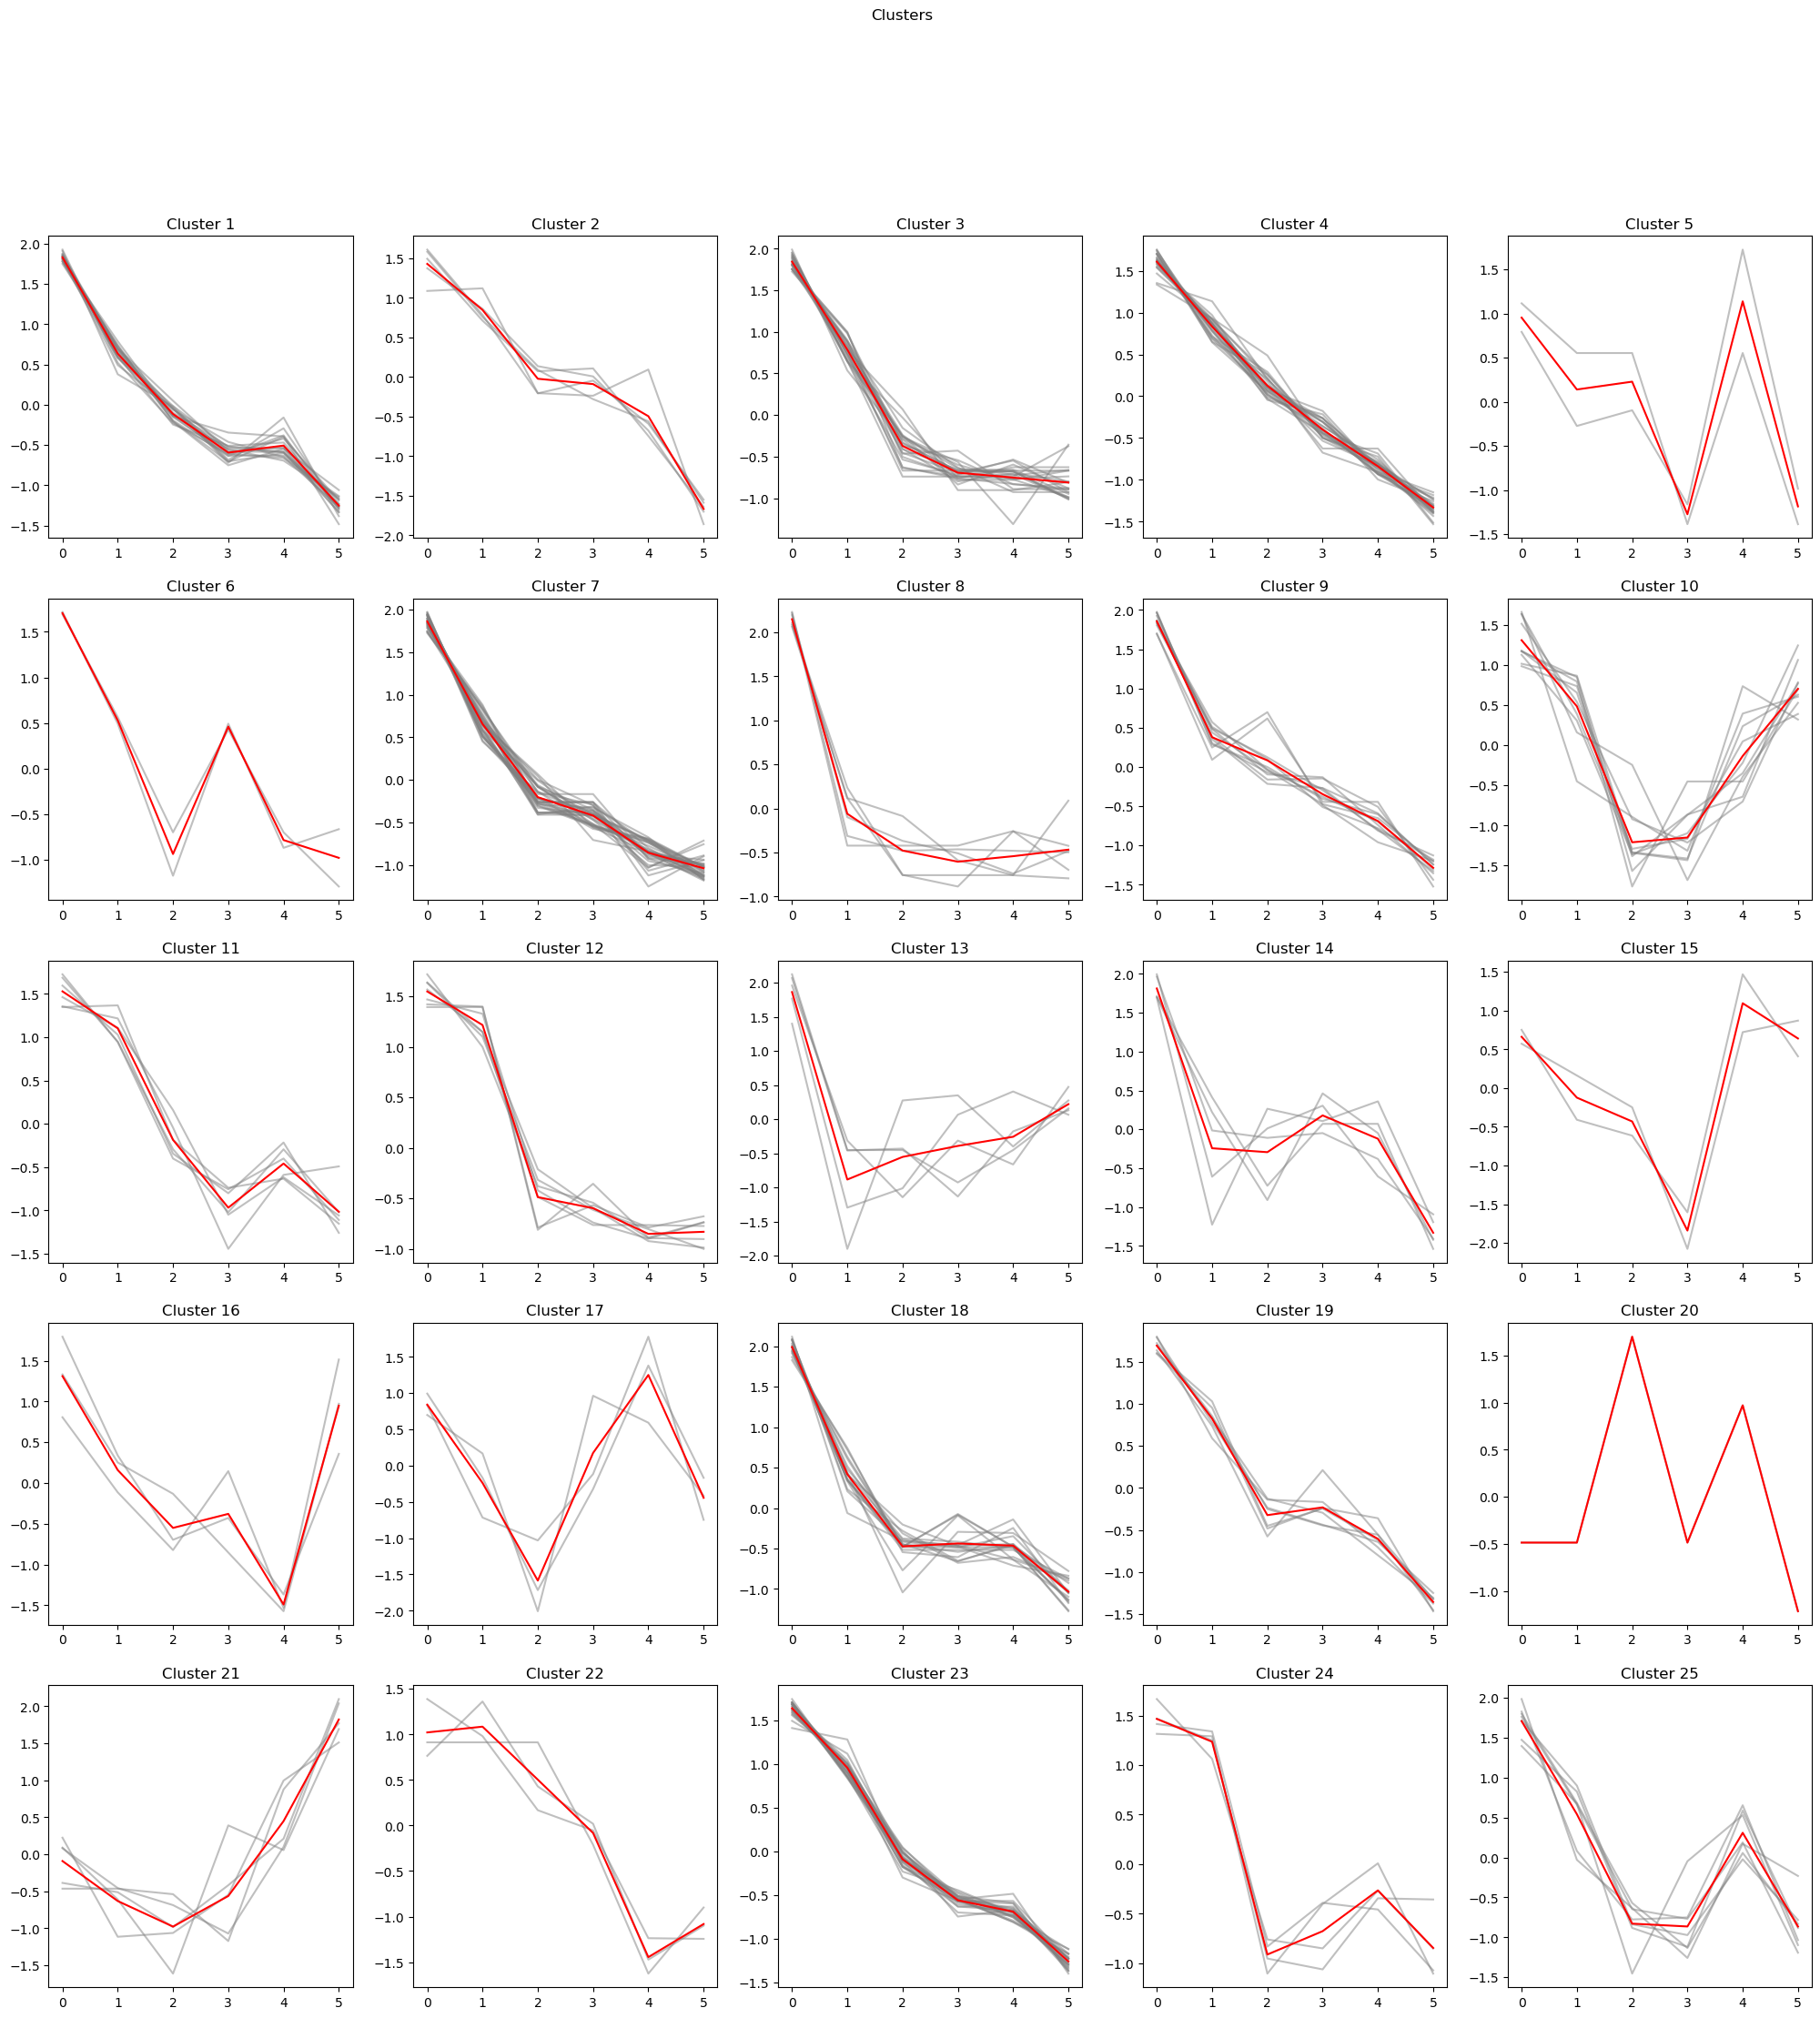

In [18]:
win_map = som.win_map(arr)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

In [23]:
#Extract Cluster
import itertools

all_list=[list(range(som_x)),list(range(som_y))]
perm=list(itertools.product(*all_list))
cluster=[]
for i in range(230):
    for j in range(len(list(perm))):
        if som.winner(arr[i])[0]==perm[j][0] and som.winner(arr[i])[1]==perm[j][1]:
            cluster.append(j)
            

In [24]:
result=(df.pivot(index='Specific_type_of_car', columns='Myyntivuosi', values='Med price' ))

In [25]:
result['som']=cluster

In [26]:
result.to_csv("20230911 hasil cluster SOM 25 nodes.csv",sep=";")

In [84]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

NameError: name 'mySeries' is not defined